In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
import numpy as np
import pandas as pd


In [3]:
#import training set
housing_train = pd.read_csv('datasets/housing/Housing_train.csv')
#import test set
housing_test = pd.read_csv('datasets/housing/Housing_test.csv')

#create a copy of the training data to work with
housing = housing_train.copy()


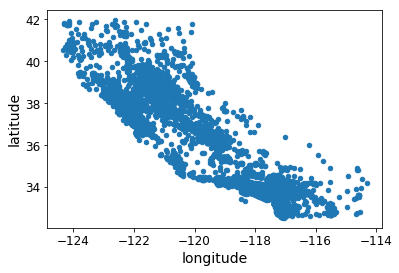

In [4]:
#Visualize Geographical data
housing.plot(kind="scatter", x="longitude", y ="latitude")

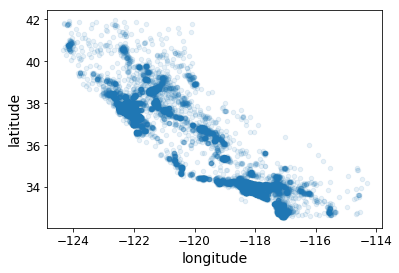

In [5]:
#Visualize Geographical data with trasparent points
housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.1)

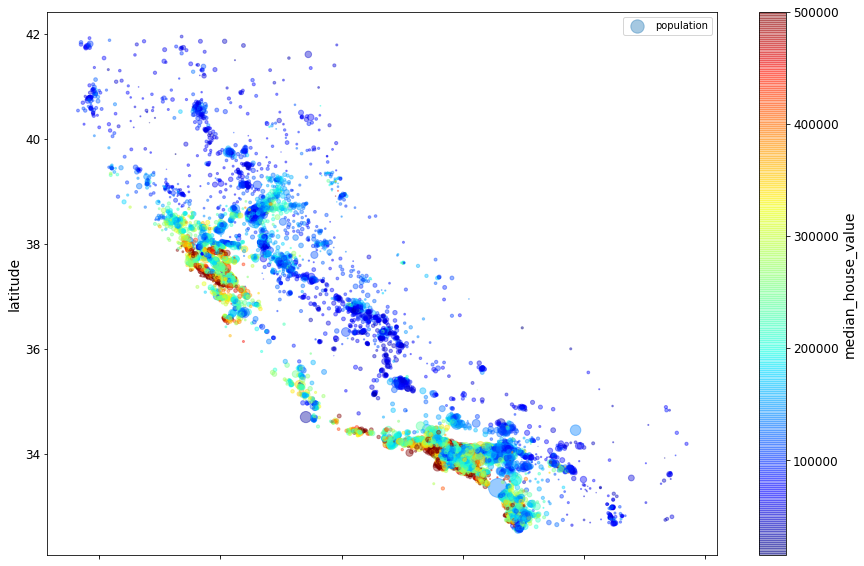

In [6]:
#Add population and housing price 
housing.plot(kind='scatter',x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, figsize=(15,10))
plt.legend()

## Create Correlation Matrix

In [7]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
Unnamed: 0            0.067723
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Anaconda2\envs\mlbook\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012EE67DE400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000012EE828F2B0>]], dtype=object)

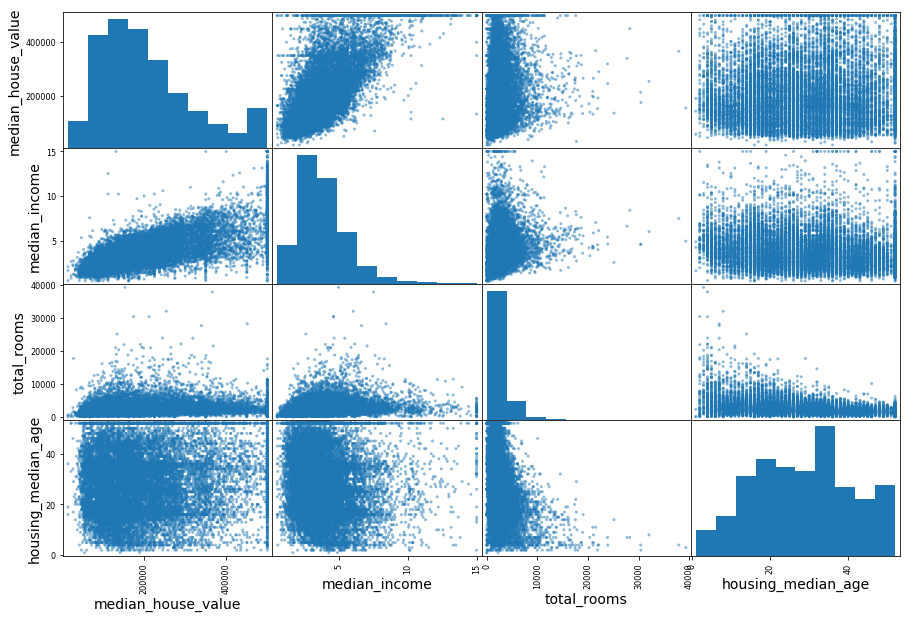

In [8]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.tools.plotting.scatter_matrix(housing[attributes],figsize=(15,10))

In [49]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [57]:
housing = housing.drop("income_cat", 1)
housing.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
mean   10332.352108   -119.575834     35.639577           28.653101   
std     5979.473431      2.001860      2.138058           12.574726   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5157.750000   -121.800000     33.940000           18.000000   
50%    10341.000000   -118.510000     34.260000           29.000000   
75%    15522.500000   -118.010000     37.720000           37.000000   
max    20638.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16512.000000    16354.000000  16512.000000  16512.000000   
mean    2622.728319      534.973890   1419.790819    497.060380   
std     2138.458419      412.699041   1115.686241    375.720845   
min        6.000000        2.000000      3.000000      2.000000   
25%     1443.000000      295.000000    784.000000    279.000000   
50%     2119.500000      433.000000   1164.000000    408.000000   
75%     3141.000000      644.000000   1719.250000    602.000000   
max    39320.000000     6210.000000  35682.000000   5358.000000   

       median_income  median_house_value  rooms_per_household  \
count   16512.000000        16512.000000         16512.000000   
mean        3.875589       206990.920724             5.440341   
std         1.904950       115703.014830             2.611712   
min         0.499900        14999.000000             1.130435   
25%         2.566775       119800.000000             4.442040   
50%         3.540900       179500.000000             5.232284   
75%         4.744475       263900.000000             6.056361   
max        15.000100       500001.000000           141.909091   

       bedrooms_per_room  population_per_household  
count       16354.000000              16512.000000  
mean            0.212878                  3.096437  
std             0.057379                 11.584826  
min             0.100000                  0.692308  
25%             0.175304                  2.431287  
50%             0.203031                  2.817653  
75%             0.239831                  3.281420  
max             1.000000               1243.333333

In [62]:
housing = housing.drop("Unnamed: 0", 1)
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575834     35.639577           28.653101   2622.728319   
std        2.001860      2.138058           12.574726   2138.458419   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.500000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income    income_cat  
count    16354.000000  16512.000000  16512.000000   16512.000000  16512.000000  
mean       534.973890   1419.790819    497.060380       3.875589      3.006541  
std        412.699041   1115.686241    375.720845       1.904950      1.054602  
min          2.000000      3.000000      2.000000       0.499900      1.000000  
25%        295.000000    784.000000    279.000000       2.566775      2.000000  
50%        433.000000   1164.000000    408.000000       3.540900      3.000000  
75%        644.000000   1719.250000    602.000000       4.744475      4.000000  
max       6210.000000  35682.000000   5358.000000      15.000100      5.000000

## Data Cleaning

In [76]:
strat_train_set = housing_train

housing = strat_train_set.drop("median_house_value", axis=1) #drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()


housing = housing.drop(["income_cat", "Unnamed: 0"], axis=1)

In [68]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
113        4629    -118.30     34.07                18.0       3759.0   
116        6068    -117.86     34.01                16.0       4632.0   
216       17923    -121.97     37.35                30.0       1955.0   
303       13656    -117.30     34.05                 6.0       2155.0   
321       19252    -122.79     38.48                 7.0       6837.0   

     total_bedrooms  population  households  median_income ocean_proximity  \
113             NaN      3296.0      1462.0         2.2708       <1H OCEAN   
116             NaN      3038.0       727.0         5.1762       <1H OCEAN   
216             NaN       999.0       386.0         4.6328       <1H OCEAN   
303             NaN      1039.0       391.0         1.6675          INLAND   
321             NaN      3468.0      1405.0         3.1662       <1H OCEAN   

     income_cat  
113         2.0  
116         4.0  
216         4.0  
303         2.0  
321         3.0

In [69]:
sample_incomplete_rows = sample_incomplete_rows.drop(["income_cat", "Unnamed: 0"], axis=1)
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
113    -118.30     34.07                18.0       3759.0             NaN   
116    -117.86     34.01                16.0       4632.0             NaN   
216    -121.97     37.35                30.0       1955.0             NaN   
303    -117.30     34.05                 6.0       2155.0             NaN   
321    -122.79     38.48                 7.0       6837.0             NaN   

     population  households  median_income ocean_proximity  
113      3296.0      1462.0         2.2708       <1H OCEAN  
116      3038.0       727.0         5.1762       <1H OCEAN  
216       999.0       386.0         4.6328       <1H OCEAN  
303      1039.0       391.0         1.6675          INLAND  
321      3468.0      1405.0         3.1662       <1H OCEAN

In [70]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
113    -118.30     34.07                18.0       3759.0           433.0   
116    -117.86     34.01                16.0       4632.0           433.0   
216    -121.97     37.35                30.0       1955.0           433.0   
303    -117.30     34.05                 6.0       2155.0           433.0   
321    -122.79     38.48                 7.0       6837.0           433.0   

     population  households  median_income ocean_proximity  
113      3296.0      1462.0         2.2708       <1H OCEAN  
116      3038.0       727.0         5.1762       <1H OCEAN  
216       999.0       386.0         4.6328       <1H OCEAN  
303      1039.0       391.0         1.6675          INLAND  
321      3468.0      1405.0         3.1662       <1H OCEAN

In [71]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [77]:
#Remove the text attribute because mediean can only be calculated on numerical attributes

housing_num = housing.drop("ocean_proximity", axis=1)

In [78]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [79]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [80]:
#Check that this is the same as manually calculating median values for each attribute

housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [83]:
#Transform the training set:

X = imputer.transform(housing_num)

In [85]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index = list(housing.index.values))

In [87]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
113    -118.30     34.07                18.0       3759.0           433.0   
116    -117.86     34.01                16.0       4632.0           433.0   
216    -121.97     37.35                30.0       1955.0           433.0   
303    -117.30     34.05                 6.0       2155.0           433.0   
321    -122.79     38.48                 7.0       6837.0           433.0   

     population  households  median_income  
113      3296.0      1462.0         2.2708  
116      3038.0       727.0         5.1762  
216       999.0       386.0         4.6328  
303      1039.0       391.0         1.6675  
321      3468.0      1405.0         3.1662

In [88]:
imputer.strategy

'median'

In [89]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   
3    -119.61     36.31                25.0       1847.0           371.0   
4    -118.59     34.23                17.0       6592.0          1525.0   

   population  households  median_income  
0       710.0       339.0         2.7042  
1       306.0       113.0         6.4214  
2       936.0       462.0         2.8621  
3      1460.0       353.0         1.8839  
4      4459.0      1463.0         3.0347

In [90]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

0     <1H OCEAN
1     <1H OCEAN
2    NEAR OCEAN
3        INLAND
4     <1H OCEAN
5        INLAND
6     <1H OCEAN
7        INLAND
8     <1H OCEAN
9     <1H OCEAN
Name: ocean_proximity, dtype: object

In [91]:
#Use Pandas' factorize() method to convert this string categorical feature to an integer categorical feature

housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [93]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [94]:
#Convert each categorical value into a One_hot vector using a OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [95]:
#housing encoder returns a sparse array by default, but this can be converted to dense array as follows

housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [96]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [97]:
#The CategoricalEncoder expectes a 2D array containting one or more categorical input
#features.  We need to reshape housing_cat to a 2D array:

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [98]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [99]:
#Alternatively you can specify the encoding to be "onehot-dense" to get a dense array by default

In [100]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [102]:
#Create a custom transformer to add extra attributes:

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 2, 4, 5, 6

class CominedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_perhousehold = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, population_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [104]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns = list(housing.columns)+
                                    ["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms population  \
0   -121.89    37.29                 38        1568            351        710   
1   -121.93    37.05                 14         679            108        306   
2    -117.2    32.77                 31        1952            471        936   
3   -119.61    36.31                 25        1847            371       1460   
4   -118.59    34.23                 17        6592           1525       4459   

  households median_income ocean_proximity rooms_per_household  \
0        339        2.7042       <1H OCEAN            0.112094   
1        113        6.4214       <1H OCEAN            0.123894   
2        462        2.8621      NEAR OCEAN           0.0670996   
3        353        1.8839          INLAND           0.0708215   
4       1463        3.0347       <1H OCEAN             0.01162   

  population_per_household  
0                   2.0944  
1                  2.70796  
2                  2.02597  
3                  4.13598  
4                  3.04785

In [105]:
#Now build a Pipeline for preprocessing the numberical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [106]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.0118312 ,
        -0.08649871, -0.32145257],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.02413582,
        -0.03353391, -0.34317621],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.14898465,
        -0.09240499, -0.23646303],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.31765664,
        -0.03055414,  0.92915581],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.08808431,
         0.06150916, -0.27834615],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.10546365,
        -0.09586294, -0.26611401]])

In [108]:
#And a transformer to just select a subset of the Pandas DataFrame columns:

from sklearn.base import BaseEstimator, TransformerMixin

#Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [109]:
#Now joing all of the these componest into a big piplein that will preprocess numerical 
#and categorical features

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cate_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [110]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [111]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [112]:
housing_prepared.shape

(16512, 16)

# Select and train a model

In [113]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
#Make a test prediction

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions", lin_reg.predict(some_data_prepared))

Predictions [ 211540.28795552  320726.25447684  211229.28617846   62615.78416742
  193565.74120875]


In [116]:
#Compare against actual values

print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [118]:
#Measure model RMSE

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68990.485680540209

In [120]:
#Try a more complex model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [121]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Fine Tuning the Model

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [125]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 70484.97323009  69093.10314427  73179.57951963  71464.26595313
  70496.67949476  76946.75539385  75039.00939909  68363.86931993
  72416.58155248  74418.19063208]
Mean: 72190.3007639
Standard deviation: 2593.64998582


In [126]:
#Compare cross-validation on linear regression

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 67335.3681614   67219.29467001  68286.12262281  74813.91206481
  68363.03146912  71707.1942537   65412.99379727  68459.29507348
  73183.32611645  68076.44534848]
Mean: 69285.6983578
Standard deviation: 2805.06051743


In [127]:
#Now try with a Random Forest

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [128]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22218.047102714016

In [130]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 52468.36146115  50377.82847661  54160.23583176  55494.6667498
  51224.48087512  56405.5978618   52220.68897735  50941.57855866
  55082.88975178  54129.75032344]
Mean: 53250.6078867
Standard deviation: 1982.66598936


In [131]:
#Optimize Hyperparameters with GridSearch

from sklearn.model_selection import GridSearchCV

param_grid = [
    #try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    #then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
    ]

forest_reg = RandomForestRegressor(random_state=42)
#train across 5 folds, that's a total of (12+6)*5 = 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [132]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [133]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [134]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66727.1559574 {'max_features': 2, 'n_estimators': 3}
56718.1796499 {'max_features': 2, 'n_estimators': 10}
53962.4036412 {'max_features': 2, 'n_estimators': 30}
60872.497224 {'max_features': 4, 'n_estimators': 3}
52694.5260997 {'max_features': 4, 'n_estimators': 10}
50516.7158465 {'max_features': 4, 'n_estimators': 30}
58592.7520611 {'max_features': 6, 'n_estimators': 3}
52102.1373775 {'max_features': 6, 'n_estimators': 10}
50095.7689034 {'max_features': 6, 'n_estimators': 30}
59454.329709 {'max_features': 8, 'n_estimators': 3}
52511.4311123 {'max_features': 8, 'n_estimators': 10}
50140.9800136 {'max_features': 8, 'n_estimators': 30}
63894.5072281 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55242.4078489 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59909.1294107 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53333.1915855 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
60670.1812816 {'bootstrap': False, 'max_features': 4, 'n_estimat

In [135]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.081401         0.004112    -4.452513e+09     -1.242590e+09   
1        0.244457         0.010921    -3.216952e+09     -6.071817e+08   
2        0.747597         0.032695    -2.911941e+09     -4.520442e+08   
3        0.119040         0.004119    -3.705461e+09     -1.008896e+09   
4        0.387740         0.011638    -2.776713e+09     -5.246128e+08   
5        1.164523         0.030775    -2.551939e+09     -3.937898e+08   
6        0.161438         0.003919    -3.433111e+09     -9.051258e+08   
7        0.528120         0.010628    -2.714633e+09     -4.970227e+08   
8        1.597560         0.030789    -2.509586e+09     -3.855493e+08   
9        0.205362         0.003825    -3.534817e+09     -9.056166e+08   
10       0.685232         0.010937    -2.757450e+09     -5.041677e+08   
11       2.060406         0.030675    -2.514118e+09     -3.870235e+08   
12       0.116241         0.004504    -4.082508e+09      0.000000e+00   
13       0.389954         0.012532    -3.051724e+09      0.000000e+00   
14       0.150409         0.004304    -3.589104e+09      0.000000e+00   
15       0.500239         0.012447    -2.844429e+09      0.000000e+00   
16       0.188717         0.004319    -3.680871e+09      0.000000e+00   
17       0.625186         0.012427    -2.794694e+09      0.000000e+00   

   param_bootstrap param_max_features param_n_estimators  \
0              NaN                  2                  3   
1              NaN                  2                 10   
2              NaN                  2                 30   
3              NaN                  4                  3   
4              NaN                  4                 10   
5              NaN                  4                 30   
6              NaN                  6                  3   
7              NaN                  6                 10   
8              NaN                  6                 30   
9              NaN                  8                  3   
10             NaN                  8                 10   
11             NaN                  8                 30   
12           False                  2                  3   
13           False                  2                 10   
14           False                  3                  3   
15           False                  3                 10   
16           False                  4                  3   
17           False                  4                 10   

                                               params  rank_test_score  \
0              {'max_features': 2, 'n_estimators': 3}               18   
1             {'max_features': 2, 'n_estimators': 10}               11   
2             {'max_features': 2, 'n_estimators': 30}                9   
3              {'max_features': 4, 'n_estimators': 3}               16   
4             {'max_features': 4, 'n_estimators': 10}                6   
5             {'max_features': 4, 'n_estimators': 30}                3   
6              {'max_features': 6, 'n_estimators': 3}               12   
7             {'max_features': 6, 'n_estimators': 10}                4   
8             {'max_features': 6, 'n_estimators': 30}                1   
9              {'max_features': 8, 'n_estimators': 3}               13   
10            {'max_features': 8, 'n_estimators': 10}                5   
11            {'max_features': 8, 'n_estimators': 30}                2   
12  {'bootstrap': False, 'max_features': 2, 'n_est...               17   
13  {'bootstrap': False, 'max_features': 2, 'n_est...               10   
14  {'bootstrap': False, 'max_features': 3, 'n_est...               14   
15  {'bootstrap': False, 'max_features': 3, 'n_est...                8   
16  {'bootstrap': False, 'max_features': 4, 'n_est...               15   
17  {'bootstrap': False, 'max_features': 4, 'n_est...                7   

    split0_test_score       ...         split2_test_score  split2_tr

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012EE95F7CC0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012EE95F7F28>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [138]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49392.3606056 {'max_features': 7, 'n_estimators': 180}
52106.9811538 {'max_features': 5, 'n_estimators': 15}
51067.0353964 {'max_features': 3, 'n_estimators': 72}
51339.988068 {'max_features': 5, 'n_estimators': 21}
49460.0018046 {'max_features': 7, 'n_estimators': 122}
51048.4128091 {'max_features': 3, 'n_estimators': 75}
50998.7811675 {'max_features': 3, 'n_estimators': 88}
49993.8821299 {'max_features': 5, 'n_estimators': 100}
50858.9962348 {'max_features': 3, 'n_estimators': 150}
65500.0301295 {'max_features': 5, 'n_estimators': 2}


In [139]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  9.19674523e-02,   8.03370903e-02,   3.81290591e-02,
         2.58671119e-02,   1.84005520e-02,   2.12032890e-02,
         1.85707634e-02,   3.92673053e-01,   1.93096026e-02,
         1.05973286e-01,   1.91416959e-02,   2.48056215e-02,
         1.25146499e-01,   8.63481684e-05,   8.34724202e-03,
         1.00413335e-02])

In [142]:

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

KeyError: 'cat_encoder'